In [7]:
!pip install sqlalchemy

In [20]:
!pip install pymssql

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 330.3 kB/s eta 0:00:06
   - -------------------------------------- 0.1/2.0 MB 469.7 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.0 MB 1.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.0 MB 1.7 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.0 MB 2.6 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/2.0 MB 3.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.4/2.0 MB 4.2 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  2.0/2.0 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 4.1 MB/s eta 0:00:00


In [12]:
import json
import numpy as np

array = '{"id": [21, 22, 23]}'
table_values  = json.loads(array)
fruits_list = np.array(table_values['id'])
fruits_list1 = fruits_list.reshape(-1, 1)
fruits_list2 = fruits_list1.tolist()
fruits_list2

[[21], [22], [23]]

In [13]:
from app.db import connectSQLDirect
import pandas as pd
from sqlalchemy import bindparam, text, String, Date, Integer
import numpy as np
import json
import numpy as np

array = '{"id": [21, 22, 23]}'
table_values  = json.loads(array)
x = np.array(table_values['id']).reshape(-1,1)
x1 = x.tolist()
con = connectSQLDirect() 

#table_values = [[19], [20]]  # list of tuples

#conn = pyodbc.connect(connectionString) 
#cursor.execute("select user_id, user_name from users")
#rows = cursor.fetchall()


stmt = """\
SET NOCOUNT ON;
DECLARE @tvpe dbo.dboListInt;

INSERT INTO @tvpe
VALUES(?);

EXEC dbo.testProc123 @tvp=@tvpe;
"""
cursor = con.cursor()

cursor.executemany(stmt, x1)

records = cursor.fetchall()
for r in records:
    print(f"{r.id}")

Connecting SQL...
1
2
3
5
2
8
10
11
17
18
21
22
23


In [10]:
tvp_columns = ["id"]
tvp_data = [[1], [2]]
tvp_json = [dict(zip(tvp_columns, row)) for row in tvp_data]
print(tvp_json)

[{'id': 1}, {'id': 2}]


In [3]:
import pyodbc
#import pymssql
import pandas as pd
tvp_columns = ["id"]
tvp_data = [[15], [16]]
tvp_json = [dict(zip(tvp_columns, row)) for row in tvp_data]
print(tvp_json)

SERVER = '192.168.0.30,49172'
DATABASE = 'NBAGame'
USERNAME = 'testuser'
PASSWORD = 'Jarea2514^'

connectionString = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}'

conn = pyodbc.connect(connectionString) 

SQL_QUERY = """
SELECT t.[PlayerID] PlayerID, t.[PlayerFirstName] FirstName
FROM [Player].[Players] t;
"""

cursor = conn.cursor()
cursor.execute(SQL_QUERY)

records = cursor.fetchall()
for r in records:
    print(f"{r.PlayerID}\t{r.FirstName}")



[{'id': 15}, {'id': 16}]
63	A. J.
291	Aaron
460	Aaron
339	Aaron
847	Abudurexiti
685	Adin
794	Aigars
851	Ailun
164	Al
424	Al
177	Al
198	Al
195	Al-Farouq
641	Alan
508	Alan
175	Alec
692	Aleksa
682	Aleksandar
769	Aleksej
808	Alessandro
628	Alex
479	Alex
351	Alexis
506	Allen
680	Almir
83	Alonzo
684	Amar
59	Amar'e
802	Amedeo
801	Amedeo
350	Amir
90	Anderson
105	Andray
661	Andre
29	Andre
153	Andre
631	Andre
347	Andrea
748	Andreas
169	Andrei
787	Andrej
791	Andrejs
21	Andres
406	Andrew
5	Andrew
11	Andrew
618	Andrew
557	Andrew
638	Andrew
675	Andrey
676	Andrey
679	Andrey
689	Andrija
203	Andris
49	Andy
89	Antawn
517	Anthony
53	Anthony
452	Anthony
363	Anthony
140	Anthony
137	Anthony
22	Antonio
327	Antonio
601	Archie
804	Ariel
280	Armon
739	Arnas
520	Aron
160	Arron
761	Artem
12	Ater
382	Austin
463	Austin
39	Avery
819	Avi Koki
806	Awudu
87	Baron
380	Ben
858	Ben
660	Ben
830	Ben
389	Ben
420	Beno
47	Bill
117	Bismack
192	Blake
736	Blake
468	Boban
877	Bobby
366	Bojan
702	Bojan
779	Bojan
781	Bojan
118	Boris

In [9]:
data_dict = {'id': [15,16]}
columns = data_dict.keys()
cols_comma_separated = ', '.join(columns)
binds_comma_separated = ', '.join(['%(' + item + ')s' for item in columns])
print(data_dict)

{'id': [15, 16]}


In [10]:
import pyodbc
import json
#import pymssql
import pandas as pd
tvp_columns = ["id"]
tvp_data = [[15], [16]]
tvp_json = [dict(zip(tvp_columns, row)) for row in tvp_data]
print(tvp_json)

SERVER = '192.168.0.30,49172'
DATABASE = 'NBAGame'
USERNAME = 'testuser'
PASSWORD = 'Jarea2514^'

connectionString = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}'

conn = pyodbc.connect(connectionString) 
#cursor.execute("select user_id, user_name from users")
#rows = cursor.fetchall()


stmt = """\
SET NOCOUNT ON;
DECLARE @tvpe dbo.dboListInt;

INSERT INTO @tvpe
VALUES(?);

EXEC dbo.testProc123 @tvp=@tvpe;
"""
cursor = conn.cursor()

cursor.executemany(stmt, tvp_data)

records = cursor.fetchall()
for r in records:
    print(f"{r.id}")
#print(crsr.fetchall())


[{'id': 15}, {'id': 16}]
1
2
3
5
2
8
10
11
15
16


In [1]:
import pandas as pd
import pytds
from pytds import login
import sqlalchemy as sa
from sqlalchemy import create_engine
import sqlalchemy_pytds

def connect():
    return pytds.connect(dsn='ServerName',database='DBName',autocommit=True, auth=login.SspiAuth())

engine = sa.create_engine('mssql+pytds://[ServerName]', creator=connect)
conn = engine.raw_connection()

with conn.cursor() as cur:
    arg = [["foo.ExternalInput","bar.ExternalInput"]]
    tvp = pytds.TableValuedParam(type_name="core.MatchColumnTable", rows=arg)
    cur.execute("EXEC test_proc @Target = N'[dbname].[tablename1]', @Source = N'[dbname].[table2]', @CleanTarget = 0, @UseColumnsFromTarget = 0, @MergeOnColumn = %s", (tvp,))
    result = cur.fetchall()
    print(result)



InterfaceError: (pyodbc.InterfaceError) ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')
(Background on this error at: https://sqlalche.me/e/20/rvf5)

In [2]:
#Simple UDTT with integers
#from app.db import connectSQLnewRun
from app.db import connectWriteSQL
import pandas as pd
from sqlalchemy import bindparam, text, String, Date, Integer
import numpy as np

con = connectWriteSQL()
#con = connectSQLnewRun() 

table_values = 11
#table_values = [[9], [10]]  # list of tuples
#table_values = [9, 10]  # list of tuples
#table_values = (9, 10)  # list of tuples

stmt = text("EXEC [dbo].[testProc123tst] @tva = :table_values")

stmt = stmt.bindparams(
                bindparam(key='table_values', value=table_values, type_=Integer)
            )
#.compile(compile_kwargs={"literal_binds": True})

"""
stmt = stmt.bindparams(
                bindparam(key='table_values', value=table_values, expanding=True)
            ).compile(compile_kwargs={"literal_binds": True})
"""
res = pd.read_sql_query(stmt, con)

res


Connecting SQL...


,id
0,1
1,2
2,3
3,5
4,2
5,8
6,10
7,11


In [2]:
#from app.db import connectSQLnewRun
from app.db import connectSQLnewRun
from sqlalchemy import bindparam, text, String, Date, Integer
import pandas as pd
import numpy as np
import pyodbc

con = connectSQLnewRun() 

matchID = 1
stmt = text('EXEC [Team].[uspRptTeamStatisticByYear_python] @MatchYearId = :matchID')

stmt = stmt.bindparams(
                bindparam('matchID', value=matchID, type_=Integer)
            )

#username='testuser'
#password='Jarea2514^'
#host='192.168.0.30'
#port='49172'
#database= 'NBAGame'
#url = 'mssql+pyodbc://{user}:{passwd}@{host}:{port}/{db}?driver=SQL+Server'.format(user=username, passwd=password, host=host, port=port, db=database)
# establishing the connection to the database using engine as an interface
#engine = create_engine(url)
res = pd.read_sql(stmt, con)
#res = pd.read_sql_query('SELECT * FROM Team.Teams', con)

res

Connecting SQL...


,rnk,TeamAllName,TotalWins,TotalLoses,PlayedGames,ScoresPlayers,Scores3Pt,Rebounds,PlayersPlayedGames,Assists,FieldGoals,Steals,Blocks,FreeThrows
0,1,Golden State Warriors,3,0,3,253,11,72,36,53,0,0,0,0
1,2,Atlanta Hawks,2,0,2,161,7,44,24,29,0,0,0,0
2,3,New York Knicks,2,0,2,182,10,45,24,42,0,0,0,0
3,4,Miami Heat,1,0,1,76,2,30,11,14,0,0,0,0
4,5,Detroit Pistons,1,0,1,75,3,31,11,14,0,0,0,0
5,6,Sacramento Kings,1,0,1,72,4,21,11,16,0,0,0,0
6,7,Minnesota Timberwolves,1,0,1,90,3,22,10,16,0,0,0,0
7,8,New Orleans Pelicans,1,0,1,80,2,24,11,13,0,0,0,0
8,9,Oklahoma City Thunder,1,0,1,74,6,25,12,14,0,0,0,0
9,10,Houston Rockets,2,1,3,241,21,74,31,43,0,0,0,0


In [2]:
#from app.db import connectSQLnewRun
from app.db import connectSQLnewRun
from sqlalchemy import bindparam, text, String, Date, Integer
import pandas as pd
import numpy as np
import pyodbc

con = connectSQLnewRun() 

#username='testuser'
#password='Jarea2514^'
#host='192.168.0.30'
#port='49172'
#database= 'NBAGame'
#url = 'mssql+pyodbc://{user}:{passwd}@{host}:{port}/{db}?driver=SQL+Server'.format(user=username, passwd=password, host=host, port=port, db=database)
# establishing the connection to the database using engine as an interface
#engine = create_engine(url)
res = pd.read_sql_query('SELECT * FROM Team.Teams', con)

res

Connecting SQL...


,TeamID,TeamName,TeamAlterName,TeamFlag,ActivePassive,FlagFileName,FullFlagFileName,DivisionID,ConferenceID,IsNationalTeam
0,CF4803FF-49EC-EC11-9B94-2C44FD27533E,Angola,AGO,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,True,None,None,1009,1036,True
1,1657EA68-4AEC-EC11-9B94-2C44FD27533E,Argentina,ARG,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,True,None,None,1009,1036,True
2,10E39D20-4BEC-EC11-9B94-2C44FD27533E,Australia,AUS,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,True,None,None,1009,1036,True
3,5F01A201-E2EC-EC11-9B94-2C44FD27533E,Brazil,BRA,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,True,None,None,1009,1036,True
4,A4C4F237-E2EC-EC11-9B94-2C44FD27533E,Canada,CAN,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,True,None,None,1009,1036,True
...,...,...,...,...,...,...,...,...,...,...
85,F9DE5036-D95B-E611-BB82-5404A695B1E0,New York,Knicks,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,True,Knicks_Logo.png,F:\gamesInstall\pes6Edits\evidenc\NBA\pics\Kni...,1,1,False
86,FADE5036-D95B-E611-BB82-5404A695B1E0,Orlando,Magic,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,True,Magic_Logo.png,F:\gamesInstall\pes6Edits\evidenc\NBA\pics\Mag...,3,1,False
87,FBDE5036-D95B-E611-BB82-5404A695B1E0,Philadelphia,76ers,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,True,76ers_Logo.png,F:\gamesInstall\pes6Edits\evidenc\NBA\pics\76e...,1,1,False
88,FCDE5036-D95B-E611-BB82-5404A695B1E0,Toronto,Raptors,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,True,Raptors_Logo.png,F:\gamesInstall\pes6Edits\evidenc\NBA\pics\Rap...,1,1,False


In [8]:
from app.db import connectSQLVerify
import pandas as pd
from sqlalchemy import bindparam, text, String, Date, Integer
import numpy as np

con = connectSQLVerify() 

matchID = 1
stmt = text('EXEC [Team].[uspRptTeamStatisticByYear_python] @MatchYearId = :matchID')

stmt = stmt.bindparams(
                bindparam('matchID', value=matchID, type_=Integer)
            )

#stmt1 = str(stmt)

res = pd.read_sql_query(stmt, con)

res.to_csv('myCSV/matches.csv', index=False)
res

Connecting SQL...
Connection failed.


TypeError: Query must be a string unless using sqlalchemy.

In [3]:
from app.db import connectSQL
import pandas as pd
from sqlalchemy import bindparam, text, String, Date, Integer
import numpy as np

con = connectSQL() 

matchID = 1
stmt = text("EXEC [Team].[uspRptTeamStatisticByYear_python] @MatchYearId = :matchID")

stmt = stmt.bindparams(
                bindparam('matchID', value=matchID, type_=Integer)
            )

res = pd.read_sql(stmt, con)

res.to_csv('myCSV/matches.csv', index=False)
res

Connection failed.


TypeError: Query must be a string unless using sqlalchemy.

In [1]:
from app.db import connectSQL
import pandas as pd
from sqlalchemy import bindparam, text, String, Date, Integer
import numpy as np

con = connectSQL() 

matchID = 1
stmt = text("EXEC [Team].[uspRptTeamStatisticByYear_python] @MatchYearId = :matchID")

stmt = stmt.bindparams(
                bindparam('matchID', value=matchID, type_=Integer)
            )

res = pd.read_sql_query(stmt, con)

res.to_csv('myCSV/matches.csv', index=False)
res

Connecting SQL...


,rnk,TeamAllName,TotalWins,TotalLoses,PlayedGames,ScoresPlayers,Scores3Pt,Rebounds,PlayersPlayedGames,Assists,FieldGoals,Steals,Blocks,FreeThrows
0,1,Golden State Warriors,3,0,3,253,11,72,36,53,0,0,0,0
1,2,Atlanta Hawks,2,0,2,161,7,44,24,29,0,0,0,0
2,3,New York Knicks,2,0,2,182,10,45,24,42,0,0,0,0
3,4,Miami Heat,1,0,1,76,2,30,11,14,0,0,0,0
4,5,Detroit Pistons,1,0,1,75,3,31,11,14,0,0,0,0
5,6,Sacramento Kings,1,0,1,72,4,21,11,16,0,0,0,0
6,7,Minnesota Timberwolves,1,0,1,90,3,22,10,16,0,0,0,0
7,8,New Orleans Pelicans,1,0,1,80,2,24,11,13,0,0,0,0
8,9,Oklahoma City Thunder,1,0,1,74,6,25,12,14,0,0,0,0
9,10,Houston Rockets,2,1,3,241,21,74,31,43,0,0,0,0


In [2]:
#Simple UDTT with integers
from app.db import connectWriteSQL
import pandas as pd
from sqlalchemy import bindparam, text, String, Date, Integer
import numpy as np

con = connectWriteSQL() 

table_values = [[9], [10]]  # list of tuples

stmt = text("EXEC [dbo].[testProc123] @tvp = :table_values")

stmt = stmt.bindparams(
                bindparam('table_values', value=table_values)
            )

res = pd.read_sql_query(stmt, con)

res



Connecting SQL...


,id
0,1
1,2
2,3
3,5
4,2
5,8


In [1]:
#UDTT parameter in SP with multiple various columns datatypes
from app.db import connectWriteSQL
import pandas as pd
from sqlalchemy import bindparam, text, String, Date, Integer
import numpy as np

con = connectWriteSQL() 

table_values = [[1,'Zizi','20221123'], [10, 'Pimpas','20221122']]  # list of tuples

stmt = text("EXEC [dbo].[testProcVarious] @tvp = :table_values")

stmt = stmt.bindparams(
                bindparam('table_values', value=table_values)
            )

res = pd.read_sql_query(stmt, con)

res

Connecting SQL...


,id,name,inserteddate
0,3,Lepo,2022-11-22
1,5,Buki,2022-11-23
2,2,Lekost,2022-11-23
3,8,Dida,2022-11-22
4,1,Zizi,2022-11-23
5,10,Pimpas,2022-11-22


In [7]:
#UDTT from dictionary to numpy to list insert

from app.db import connectWriteSQL
from app import cfi3
import pyodbc as pyo
import pandas as pd
from sqlalchemy import bindparam, text, String, Date, Integer
import numpy as np

con = connectWriteSQL() 

data = {"id": [19, 37, 25, 78],
        "name": ["Mil", "Karrr", "Pos", "Repto"],
        "dateinser": ["20221105", "20221108", "20221112", "20221114"]}

#table_values = [dict(zip(data, col)) for col in zip(*data.values())]

table_values = np.array(list(data.values())).T
table_values = table_values.tolist()
table_values

stmt = text("EXEC [dbo].[testProcVarious] @tvp = :table_values")

stmt = stmt.bindparams(
                bindparam('table_values', value=table_values)
            )

res = pd.read_sql_query(stmt, con)

res


Connecting SQL...


,id,name,inserteddate
0,3,Lepo,2022-11-22
1,5,Buki,2022-11-23
2,2,Lekost,2022-11-23
3,8,Dida,2022-11-22
4,1,Zizi,2022-11-23
5,10,Pimpas,2022-11-22
6,7,Pecos,2022-11-02
7,12,Wero,2022-11-02
8,21,Leloi,2022-11-02
9,33,Agos,2022-11-02


In [1]:
#UDTT from dictionary to tuples insert

from app.db import connectWriteSQL
from app import cfi3
import pyodbc as pyo
import pandas as pd
from sqlalchemy import bindparam, text, String, Date, Integer
import numpy as np

con = connectWriteSQL() 

data = {"id": [12, 33, 21, 7],
        "name": ["Wero", "Agos", "Leloi", "Pecos"],
        "dateinser": ["20221102", "20221102", "20221102", "20221102"]}

#table_values = [dict(zip(data, col)) for col in zip(*data.values())]

table_values = [col for col in zip(*data.values())]
table_values

stmt = text("EXEC [dbo].[testProcVarious] @tvp = :table_values")

stmt = stmt.bindparams(
                bindparam('table_values', value=table_values)
            )

res = pd.read_sql_query(stmt, con)

res

Connecting SQL...


,id,name,inserteddate
0,3,Lepo,2022-11-22
1,5,Buki,2022-11-23
2,2,Lekost,2022-11-23
3,8,Dida,2022-11-22
4,1,Zizi,2022-11-23
5,10,Pimpas,2022-11-22
6,7,Pecos,2022-11-02
7,12,Wero,2022-11-02
8,21,Leloi,2022-11-02
9,33,Agos,2022-11-02


In [2]:
data = {"id": [12, 33, 21, 7],
        "name": ["Wero", "Agos", "Leloi", "Pecos"],
        "dateinser": ["20221102", "20221102", "20221102", "20221102"]}

table_values = [col for col in zip(*data.values())]
table_values

[(12, 'Wero', '20221102'),
 (33, 'Agos', '20221102'),
 (21, 'Leloi', '20221102'),
 (7, 'Pecos', '20221102')]

In [76]:
readdata = pd.read_csv('myCSV/matches.csv', index_col = ["rnk"])
readdata = pd.DataFrame(readdata)
readdata

,TeamAllName,TotalWins,TotalLoses,PlayedGames,ScoresPlayers,Scores3Pt,Rebounds,PlayersPlayedGames,Assists,FieldGoals,Steals,Blocks,FreeThrows
rnk,,,,,,,,,,,,,
1,Golden State Warriors,3,0,3,253,11,72,36,53,0,0,0,0
2,Atlanta Hawks,2,0,2,161,7,44,24,29,0,0,0,0
3,New York Knicks,2,0,2,182,10,45,24,42,0,0,0,0
4,Miami Heat,1,0,1,76,2,30,11,14,0,0,0,0
5,Detroit Pistons,1,0,1,75,3,31,11,14,0,0,0,0
6,Sacramento Kings,1,0,1,72,4,21,11,16,0,0,0,0
7,Minnesota Timberwolves,1,0,1,90,3,22,10,16,0,0,0,0
8,New Orleans Pelicans,1,0,1,80,2,24,11,13,0,0,0,0
9,Oklahoma City Thunder,1,0,1,74,6,25,12,14,0,0,0,0


In [77]:
cols = ["TeamAllName","TotalWins","PlayedGames","TotalLoses","ScoresPlayers","Scores3Pt","Rebounds", "Assists"]
readdata = readdata.reindex(columns=cols)
#p = p.reindex(columns=['1Sun', '2Mon', '3Tue', '4Wed', '5Thu', '6Fri', '7Sat'])
readdata = readdata.loc[:, cols]
readdata = readdata[(readdata["TotalWins"] >= 1) & (readdata["PlayedGames"] >= 1)]
readdata


,TeamAllName,TotalWins,PlayedGames,TotalLoses,ScoresPlayers,Scores3Pt,Rebounds,Assists
rnk,,,,,,,,
1,Golden State Warriors,3,3,0,253,11,72,53
2,Atlanta Hawks,2,2,0,161,7,44,29
3,New York Knicks,2,2,0,182,10,45,42
4,Miami Heat,1,1,0,76,2,30,14
5,Detroit Pistons,1,1,0,75,3,31,14
6,Sacramento Kings,1,1,0,72,4,21,16
7,Minnesota Timberwolves,1,1,0,90,3,22,16
8,New Orleans Pelicans,1,1,0,80,2,24,13
9,Oklahoma City Thunder,1,1,0,74,6,25,14


In [78]:
readdata.reset_index(inplace = True)
readdata

,rnk,TeamAllName,TotalWins,PlayedGames,TotalLoses,ScoresPlayers,Scores3Pt,Rebounds,Assists
0,1,Golden State Warriors,3,3,0,253,11,72,53
1,2,Atlanta Hawks,2,2,0,161,7,44,29
2,3,New York Knicks,2,2,0,182,10,45,42
3,4,Miami Heat,1,1,0,76,2,30,14
4,5,Detroit Pistons,1,1,0,75,3,31,14
5,6,Sacramento Kings,1,1,0,72,4,21,16
6,7,Minnesota Timberwolves,1,1,0,90,3,22,16
7,8,New Orleans Pelicans,1,1,0,80,2,24,13
8,9,Oklahoma City Thunder,1,1,0,74,6,25,14
9,10,Houston Rockets,2,3,1,241,21,74,43


In [79]:
readdata = readdata.set_index('TeamAllName')
readdata

,rnk,TotalWins,PlayedGames,TotalLoses,ScoresPlayers,Scores3Pt,Rebounds,Assists
TeamAllName,,,,,,,,
Golden State Warriors,1,3,3,0,253,11,72,53
Atlanta Hawks,2,2,2,0,161,7,44,29
New York Knicks,3,2,2,0,182,10,45,42
Miami Heat,4,1,1,0,76,2,30,14
Detroit Pistons,5,1,1,0,75,3,31,14
Sacramento Kings,6,1,1,0,72,4,21,16
Minnesota Timberwolves,7,1,1,0,90,3,22,16
New Orleans Pelicans,8,1,1,0,80,2,24,13
Oklahoma City Thunder,9,1,1,0,74,6,25,14


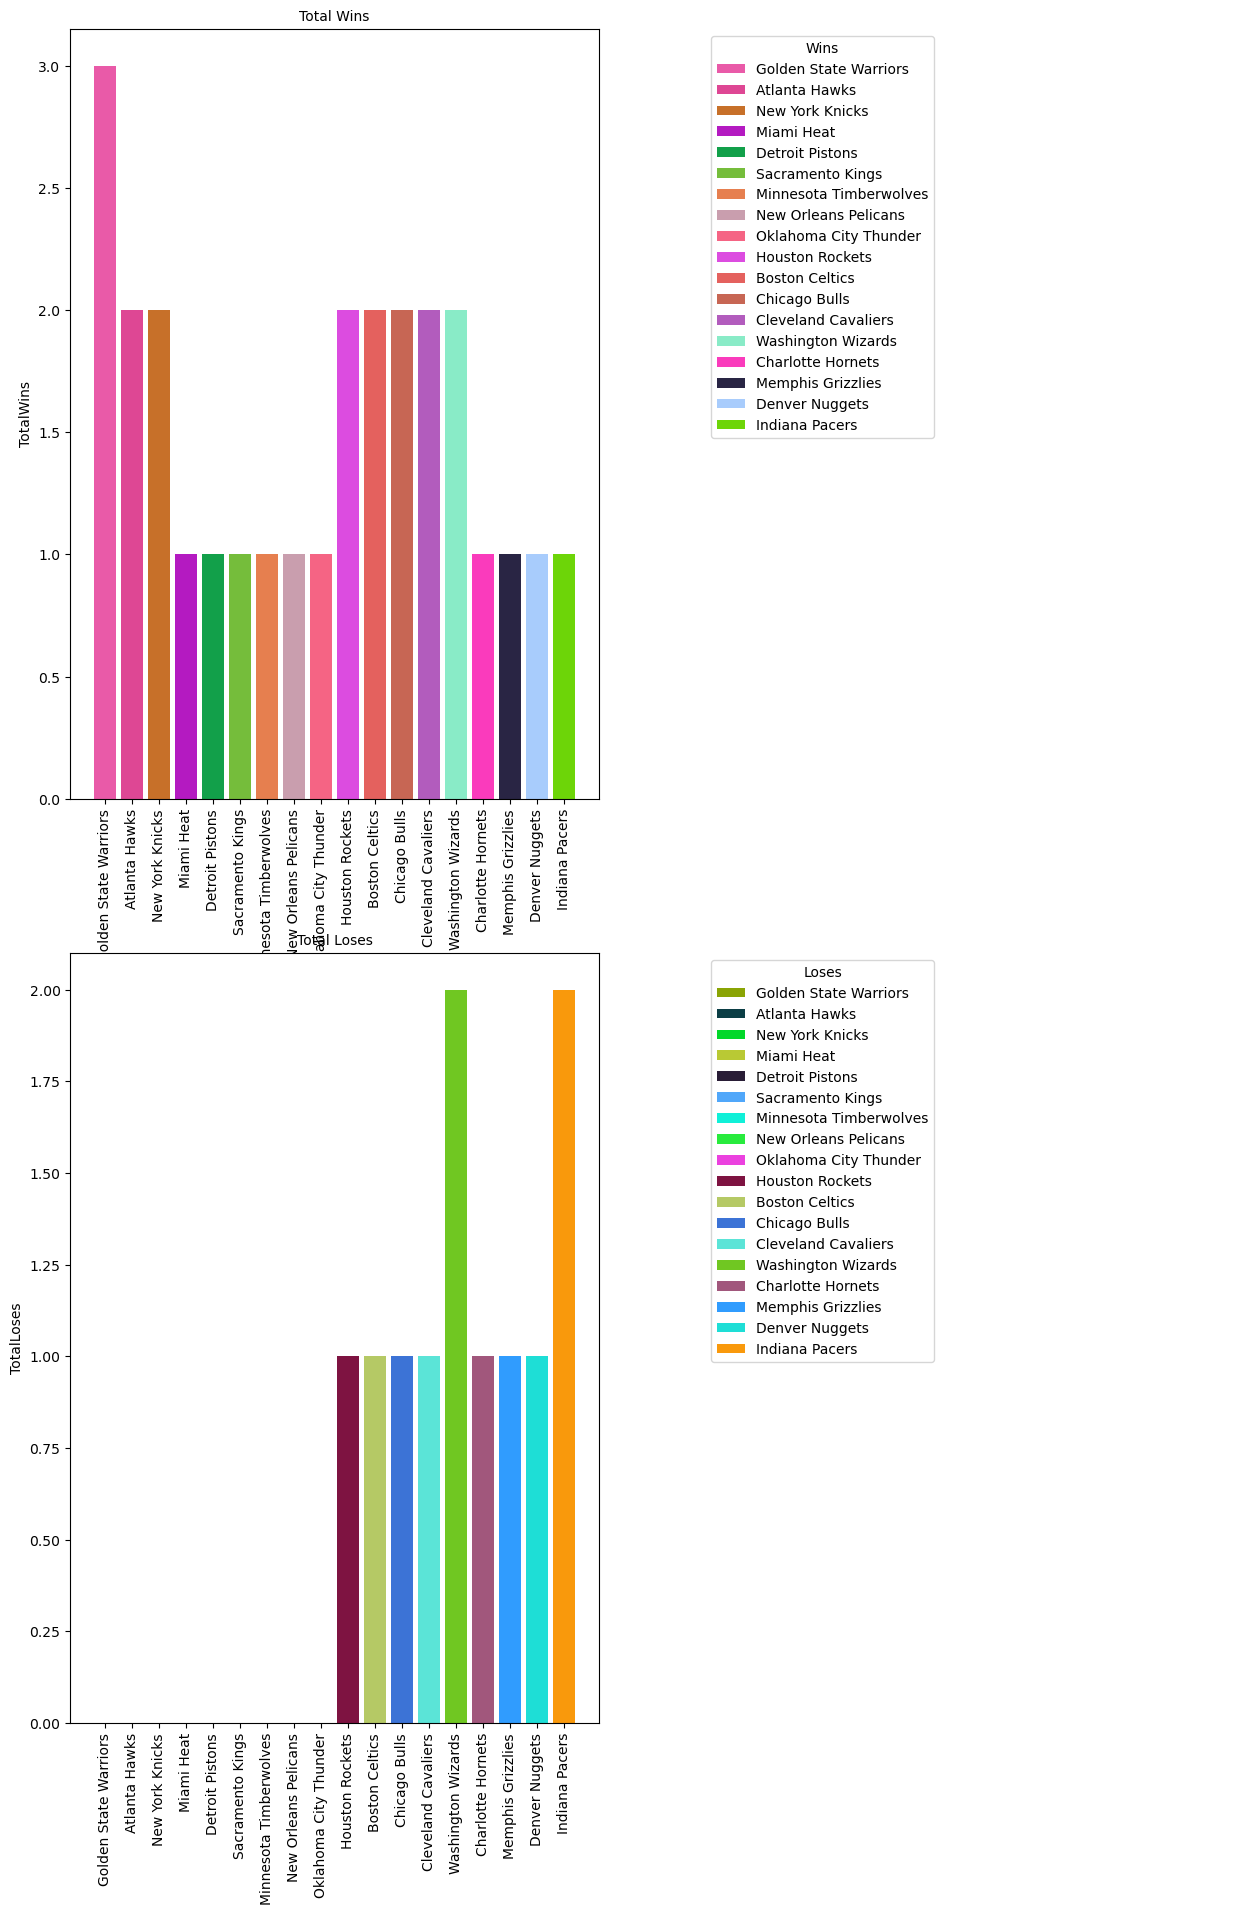

In [94]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random

N1 = len(readdata)

f = plt.figure()
f = plt.gcf()
f.set_size_inches(15,22)

ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,3)
ax1_legend = f.add_subplot(2,2,2)
ax2_legend = f.add_subplot(2,2,4)

def get_results(length, sub_plot, dataset, colname, angle):
    
    hexa = '0123456789ABCDEF'

    colors = ["#" + ''.join([random.choice(hexa) for j in range(6)]) for i in range(length)]

    x = np.arange(length).astype(int)
    y = np.array(dataset[colname])
    idxCol = np.array(dataset.index)

    sub_plot.bar(x, y)
    for i,p in enumerate(sub_plot.patches):
        p.set_facecolor(colors[i])    
        p.set_label(idxCol[i])  
        
    handles, labels = sub_plot.get_legend_handles_labels()  
    
    sub_plot.set_xticks(x, np.array(dataset.index), rotation=angle)
    return sub_plot, handles, labels

if __name__ == "__main__":
    ax1, handles1, labels1 = get_results(N1, ax1, readdata, "TotalWins", 90)
    ax1.set_ylabel("TotalWins")
    ax2, handles2, labels2 = get_results(N1, ax2, readdata, "TotalLoses", 90)    
    ax2.set_ylabel("TotalLoses")
    
    #ax1.legend()
    ax1_legend.axis(False)
    ax1_legend.legend(handles1, labels1, title="Wins", loc="upper left")
    ax2_legend.axis(False)
    ax2_legend.legend(handles2, labels2, title="Loses", loc="upper left")
    ax1.set_title('Total Wins', fontsize=10)
    ax2.set_title('Total Loses', fontsize=10)    
    

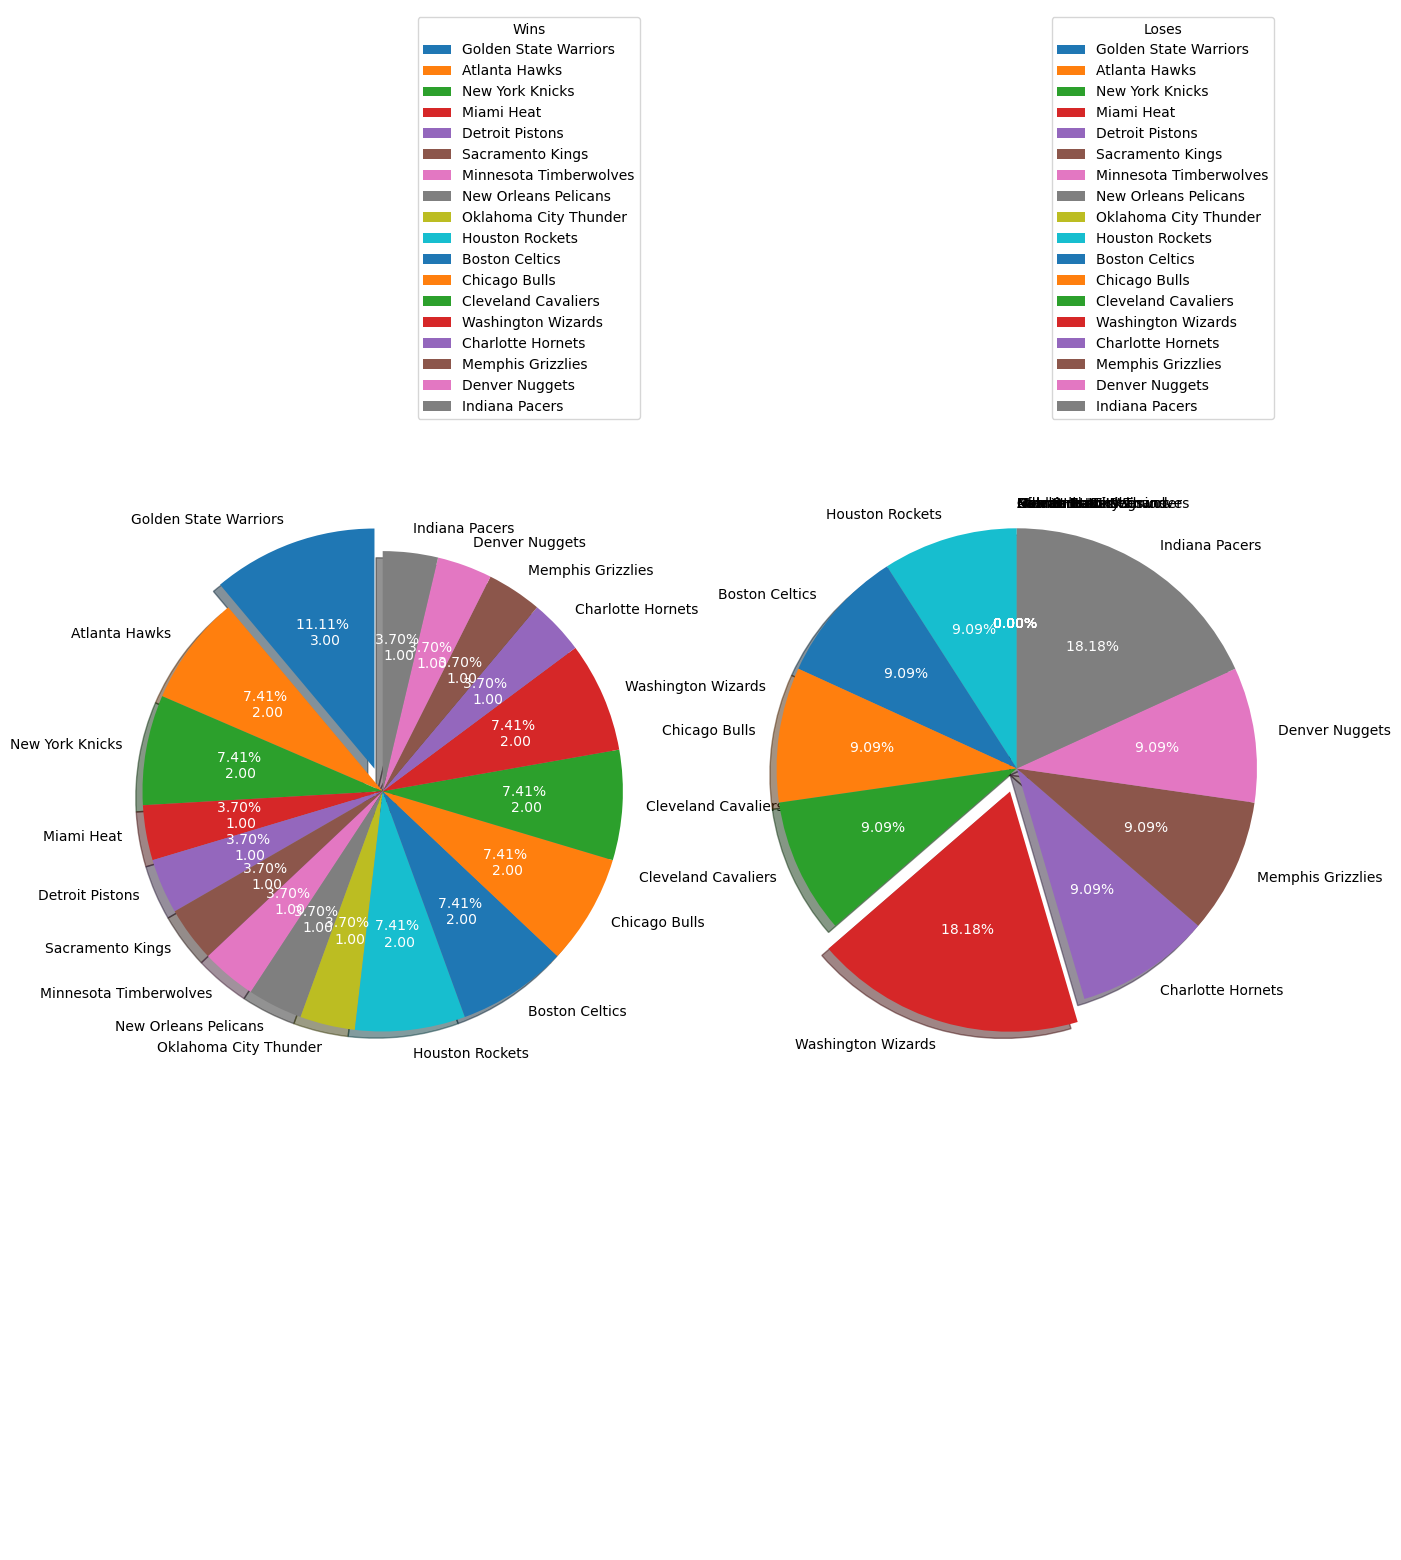

In [93]:
f1 = plt.figure()
ax1 = f1.add_subplot(1,2,1)
ax2 = f1.add_subplot(1,2,2)
f1 = plt.gcf()
f1.set_size_inches(15,20)

def get_pie(length, dataset, colname, originaldata, titles, sub_plot):
    ind = np.argmax(np.array(dataset[colname]))

    expl = [0.1 if i==ind else 0. for i in range(length) ]
    
    if originaldata:
        data = lambda p:f'{p:.2f}% \n{p*sum(np.array(dataset[colname]))/100 :.2f}'
    else:
        data = lambda p:f'{p:.2f}% '

    r, t, u = sub_plot.pie(np.array(dataset[colname]), explode=expl,labels=dataset.index, 
                  autopct=data, 
                  shadow=True, startangle=90)
    sub_plot.legend(r, dataset.index, title=titles, loc="best")
    # Equal aspect ratio ensures that pie is drawn as a circle.
    sub_plot.axis('equal')

    plt.setp(u, color='white')
    
if __name__ == "__main__":    
    a1 = get_pie(N1, readdata, "TotalWins", True, "Wins", ax1)
    a2 = get_pie(N1, readdata, "TotalLoses", False, "Loses", ax2)
    plt.show()
    f1.savefig(fname="myCSV/TeamsStats.pdf", dpi=400, format="pdf")